<a href="https://colab.research.google.com/github/kumar1607/Face-Mask-Detection-CNN/blob/main/Face_Mask_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:10<00:00, 19.5MB/s]
100% 163M/163M [00:10<00:00, 16.1MB/s]


# Extracting Dataset

In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls #we can see what are all the files we have

data  face-mask-dataset.zip  kaggle.json  sample_data


# Importing the Dependencies

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3479.jpg', 'with_mask_141.jpg', 'with_mask_3136.jpg', 'with_mask_521.jpg', 'with_mask_3711.jpg']
['with_mask_133.jpg', 'with_mask_761.jpg', 'with_mask_16.jpg', 'with_mask_1850.jpg', 'with_mask_3307.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_187.jpg', 'without_mask_3433.jpg', 'without_mask_659.jpg', 'without_mask_3651.jpg', 'without_mask_1287.jpg']
['without_mask_1459.jpg', 'without_mask_3540.jpg', 'without_mask_663.jpg', 'without_mask_1915.jpg', 'without_mask_3802.jpg']


In [10]:
print('Number of images with mask :', len(with_mask_files))
print('Number of images without mask :', len(without_mask_files))

Number of images with mask : 3725
Number of images without mask : 3828


# Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Displaying the Images

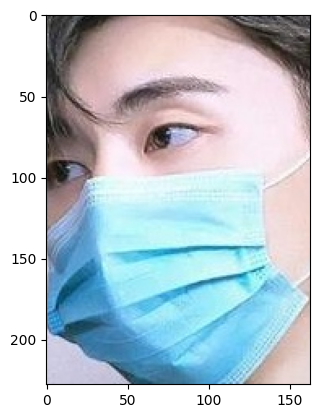

In [15]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

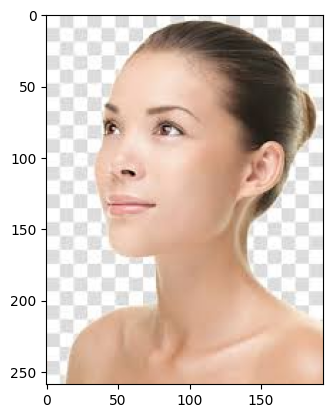

In [16]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing

1.Resize the Images

2.Convert the images to numpy arrays

In [17]:
# converting images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)


list

In [20]:
len(data)

7553

array([[[ 26,  15,  13],
        [ 26,  15,  12],
        [ 26,  15,  11],
        ...,
        [ 38,  23,  16],
        [ 38,  23,  15],
        [ 37,  22,  15]],

       [[ 26,  15,  13],
        [ 25,  14,  12],
        [ 25,  14,   9],
        ...,
        [ 36,  21,  14],
        [ 34,  19,  12],
        [ 34,  19,  12]],

       [[ 24,  15,  10],
        [ 24,  14,  10],
        [ 25,  14,  10],
        ...,
        [ 33,  18,  13],
        [ 32,  17,  12],
        [ 32,  17,  12]],

       ...,

       [[134,  18,  27],
        [141,  25,  34],
        [144,  28,  37],
        ...,
        [170,  36,  58],
        [186,  45,  68],
        [191,  44,  67]],

       [[150,  40,  47],
        [142,  33,  39],
        [134,  21,  29],
        ...,
        [168,  29,  50],
        [175,  30,  52],
        [169,  20,  42]],

       [[166,  59,  65],
        [187,  79,  85],
        [206,  95, 101],
        ...,
        [190,  50,  69],
        [196,  50,  71],
        [190,  41,  63]]], dtype=uint8)
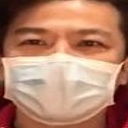

In [22]:
data[1]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


# Train Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[153, 166, 187],
        [149, 162, 184],
        [144, 157, 176],
        ...,
        [171, 192, 192],
        [217, 237, 232],
        [218, 240, 209]],

       [[162, 174, 201],
        [158, 171, 198],
        [153, 167, 192],
        ...,
        [185, 204, 202],
        [215, 235, 218],
        [226, 245, 206]],

       [[164, 179, 205],
        [162, 175, 202],
        [158, 171, 197],
        ...,
        [235, 247, 238],
        [226, 244, 214],
        [236, 251, 219]],

       ...,

       [[ 52,  58,  71],
        [ 68,  58,  65],
        [ 78,  41,  43],
        ...,
        [ 19,  25,  36],
        [ 20,  26,  38],
        [ 21,  27,  41]],

       [[ 61,  57,  68],
        [ 68,  48,  53],
        [ 70,  39,  43],
        ...,
        [ 21,  26,  39],
        [ 23,  28,  43],
        [ 24,  30,  48]],

       [[ 69,  46,  54],
        [ 67,  39,  44],
        [ 67,  41,  46],
        ...,
        [ 24,  30,  47],
        [ 28,  33,  52],
        [ 30,  37,  56]]], dtype=uint8)
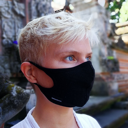

In [32]:
X_train[0]

In [33]:
X_train_scaled[0]

array([[[0.6       , 0.65098039, 0.73333333],
        [0.58431373, 0.63529412, 0.72156863],
        [0.56470588, 0.61568627, 0.69019608],
        ...,
        [0.67058824, 0.75294118, 0.75294118],
        [0.85098039, 0.92941176, 0.90980392],
        [0.85490196, 0.94117647, 0.81960784]],

       [[0.63529412, 0.68235294, 0.78823529],
        [0.61960784, 0.67058824, 0.77647059],
        [0.6       , 0.65490196, 0.75294118],
        ...,
        [0.7254902 , 0.8       , 0.79215686],
        [0.84313725, 0.92156863, 0.85490196],
        [0.88627451, 0.96078431, 0.80784314]],

       [[0.64313725, 0.70196078, 0.80392157],
        [0.63529412, 0.68627451, 0.79215686],
        [0.61960784, 0.67058824, 0.77254902],
        ...,
        [0.92156863, 0.96862745, 0.93333333],
        [0.88627451, 0.95686275, 0.83921569],
        [0.9254902 , 0.98431373, 0.85882353]],

       ...,

       [[0.20392157, 0.22745098, 0.27843137],
        [0.26666667, 0.22745098, 0.25490196],
        [0.30588235, 0

# Building a Convolutional Neural Networks (CNN)

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 4s 25ms/step - loss: 0.1398 - acc: 0.9492 - val_loss: 0.1911 - val_acc: 0.9322
Epoch 2/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1153 - acc: 0.9599 - val_loss: 0.1765 - val_acc: 0.9388
Epoch 3/10
170/170 [==============================] - 3s 18ms/step - loss: 0.0960 - acc: 0.9654 - val_loss: 0.2106 - val_acc: 0.9372
Epoch 4/10
170/170 [==============================] - 3s 20ms/step - loss: 0.0766 - acc: 0.9728 - val_loss: 0.2237 - val_acc: 0.9405
Epoch 5/10
170/170 [==============================] - 3s 19ms/step - loss: 0.0950 - acc: 0.9695 - val_loss: 0.2863 - val_acc: 0.9306
Epoch 6/10
170/170 [==============================] - 3s 18ms/step - loss: 0.0652 - acc: 0.9752 - val_loss: 0.2578 - val_acc: 0.9355
Epoch 7/10
170/170 [==============================] - 4s 22ms/step - loss: 0.0644 - acc: 0.9772 - val_loss: 0.2581 - val_acc: 0.9421
Epoch 8/10
170/170 [==============================] - 5s 27ms/step - 

# Model Evaluation

In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.3290 - acc: 0.9265
Test Accuracy = 0.9265387058258057


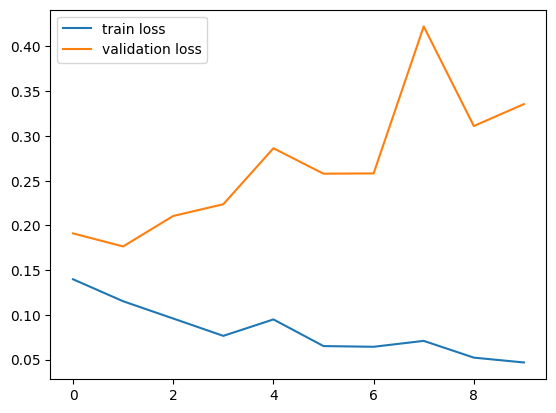

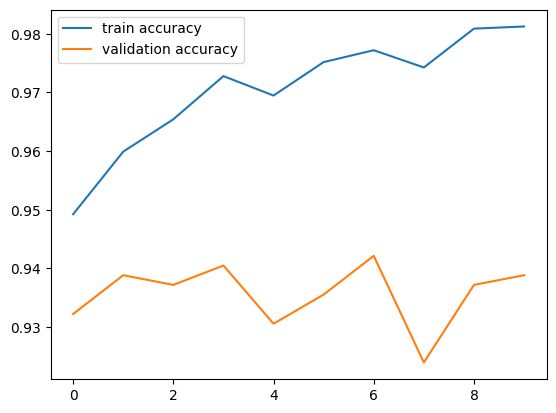

In [40]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Predictive System

Path of the image to be predicted: /content/mana photo.jpg


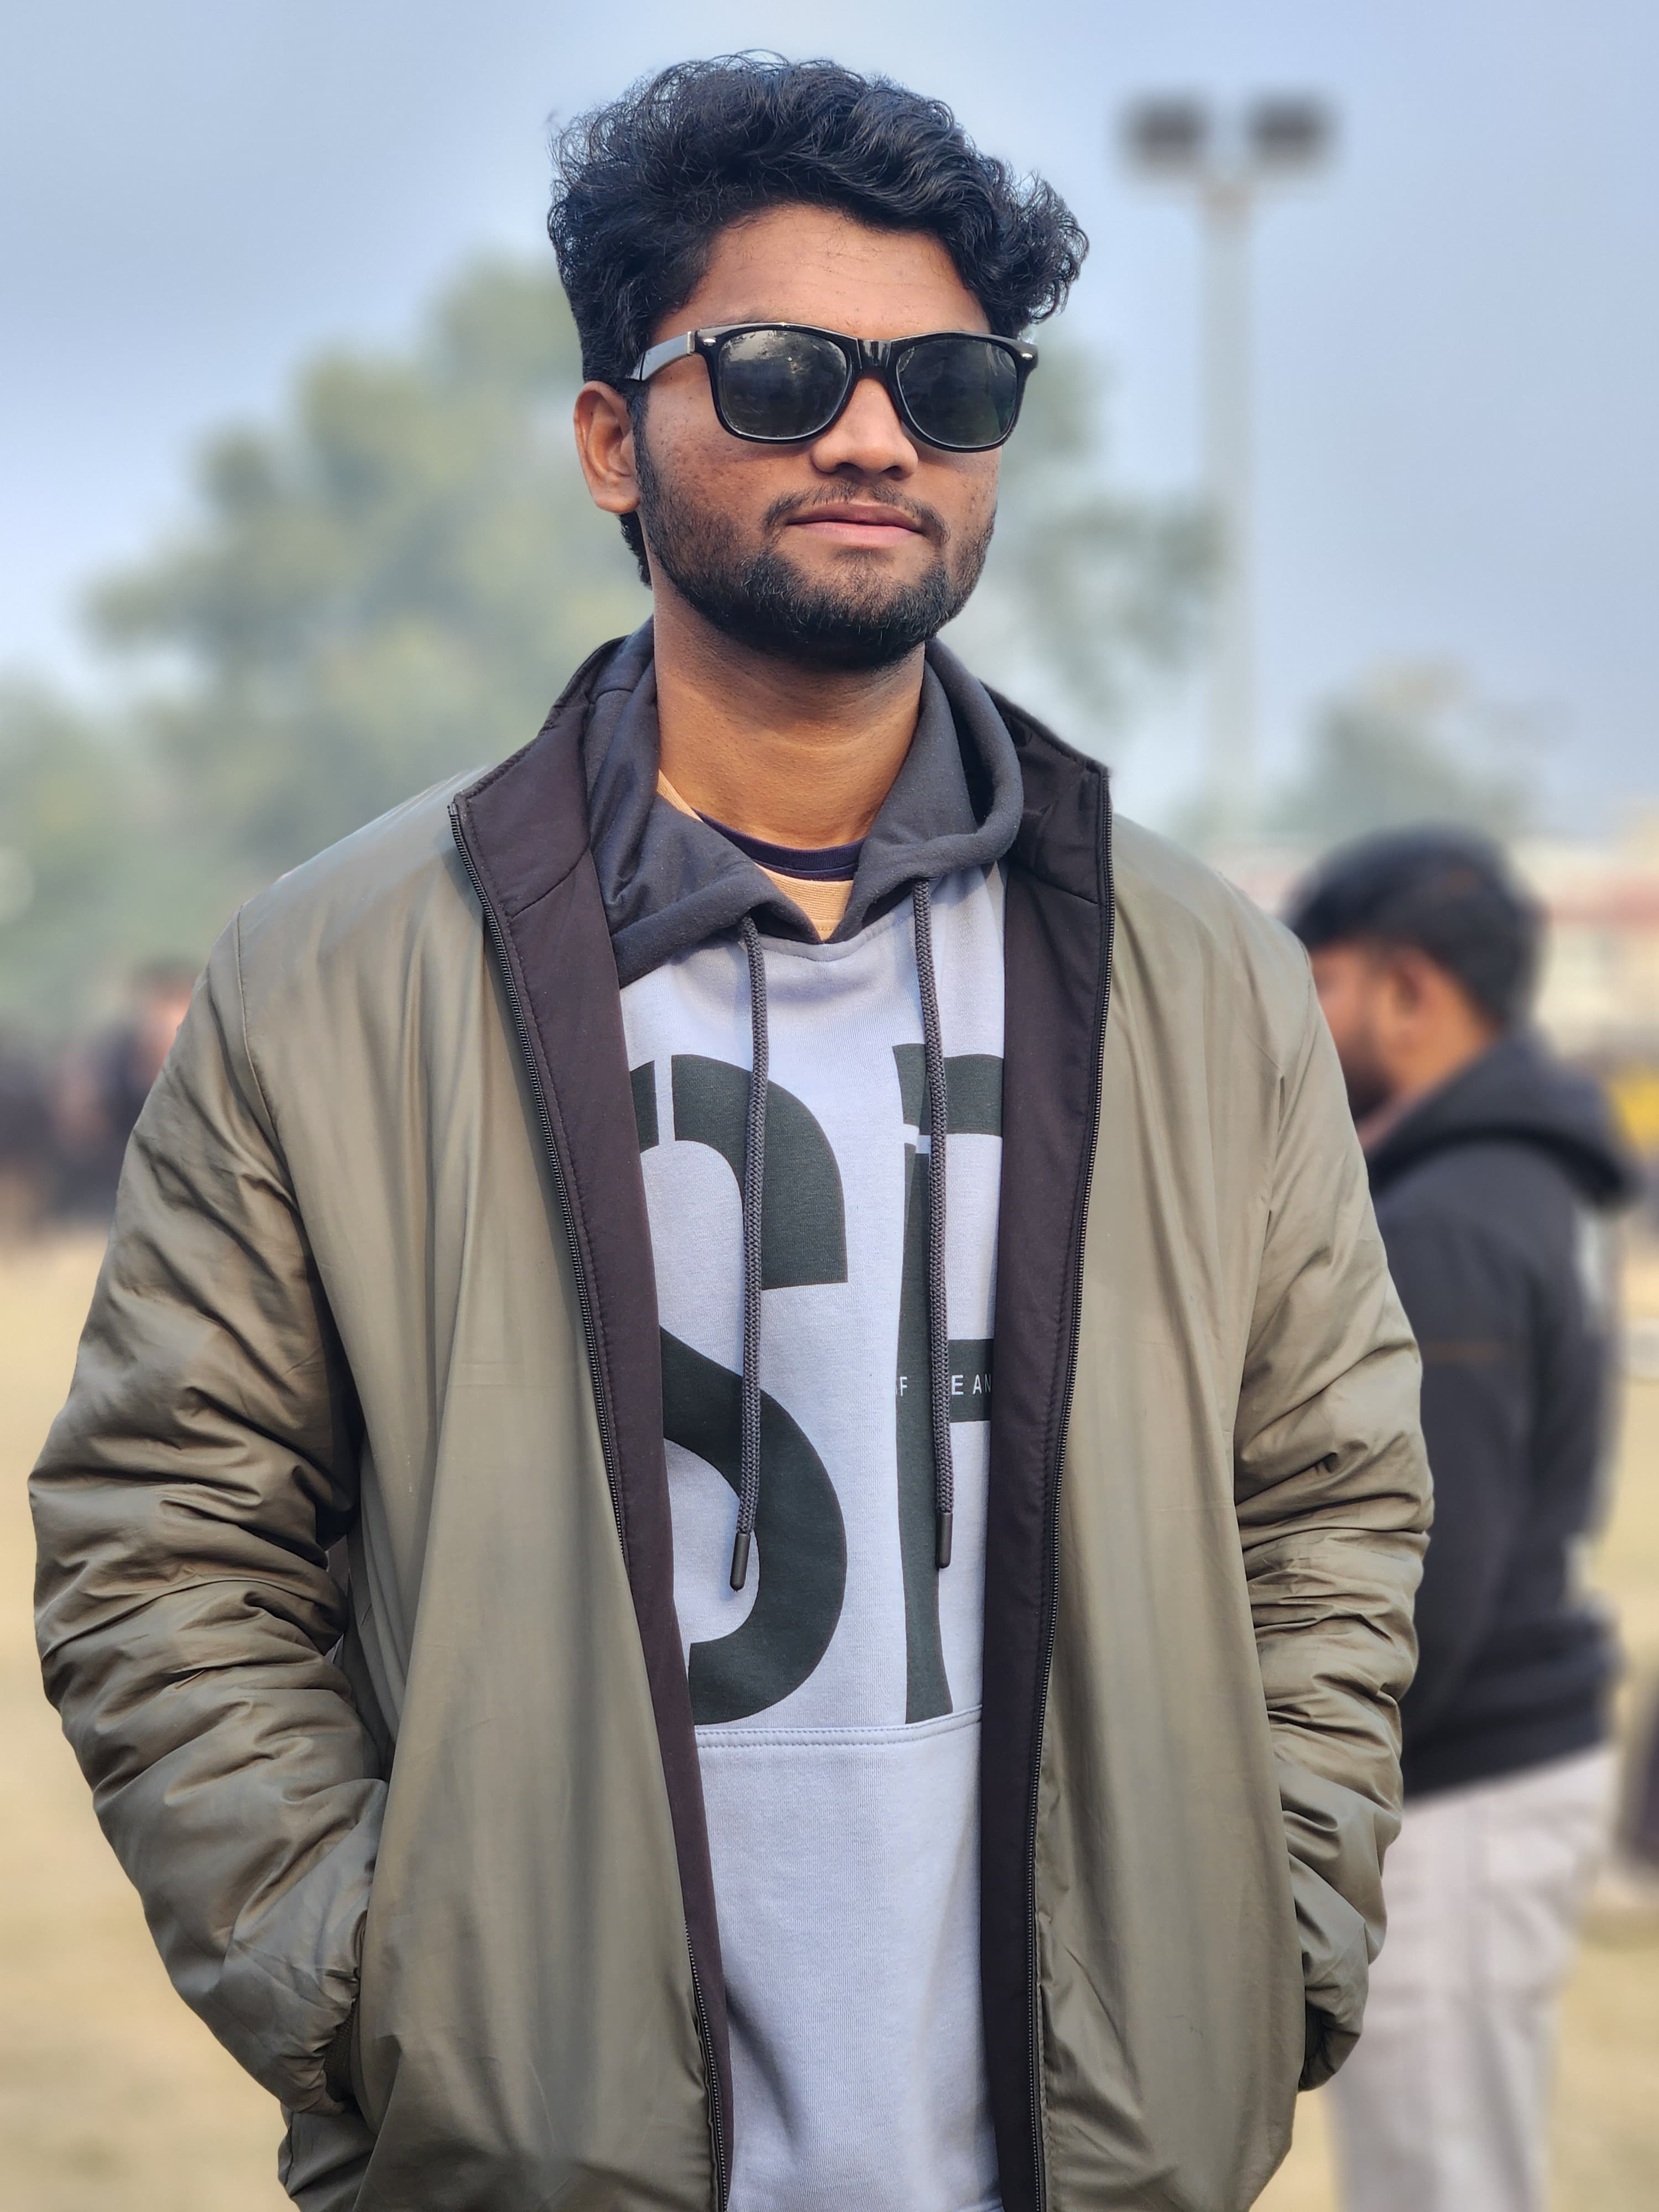

1/1 [==============================] - 0s 25ms/step
[[0.6155891 0.588357 ]]
0
The person in the image is not wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/mask.jpeg


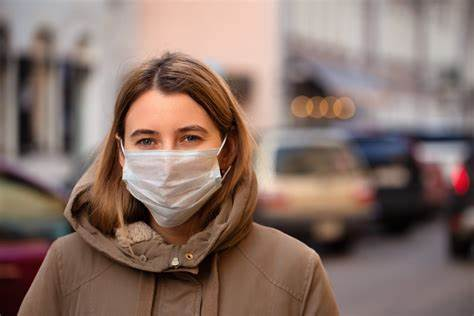

1/1 [==============================] - 0s 21ms/step
[[8.413281e-04 9.941573e-01]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')